# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [20]:
base = pd.read_csv(r"C:\Users\Positivo\Desktop\Cursos\Curso Ciencias de dados Ebac\Ciencias de dados\Módulo7-ÁrvoresI\base_nova.csv")

base.tail()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
16645,16645,1,1,0,0,54.109589,9.884932,1,0,0,...,0,0,0,0,0,1,0,0,0,0
16646,16646,1,1,0,0,43.389041,7.380822,1,1,1,...,1,0,0,0,0,1,0,0,0,0
16647,16647,0,0,0,0,30.005479,9.800000,1,1,0,...,1,0,0,0,0,1,0,0,0,0
16648,16648,0,0,0,0,30.005479,9.800000,1,1,0,...,1,0,0,0,0,1,0,0,0,0
16649,16649,1,1,0,0,33.936986,3.630137,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [21]:
base.shape

(16650, 34)

In [22]:
base.drop_duplicates(inplace=True)

In [23]:
base.shape

(16650, 34)

In [24]:
base_tratrada = base.copy()

In [27]:
base_tratrada = base_tratrada.drop("Unnamed: 0",axis=1)

In [32]:
base_tratrada.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [30]:
base_tratrada.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Commercial associate             int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Academic degree                    int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64


### Legenda
- sexo m = 0 e f = 1
- mau sim = 1 e não = 0

In [35]:
x = base_tratrada.drop("mau",axis=1)
y = base_tratrada["mau"]

In [36]:
# Separando em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [39]:
# Arvore com apenas 2 variaveis

clf = DecisionTreeClassifier(random_state=100)

clf

DecisionTreeClassifier(random_state=100)

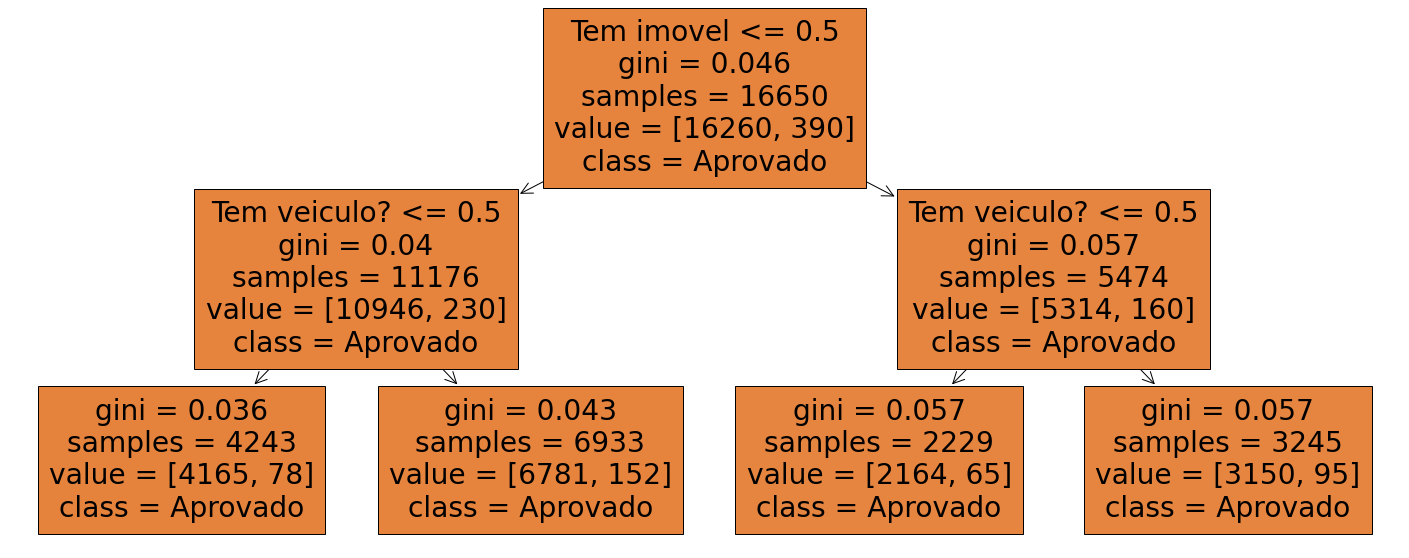

In [61]:
clf = clf.fit(x[["posse_de_veiculo","posse_de_imovel"]],y)

plt.figure(figsize=[25,10])
plot_tree(
    clf,
    filled=True,
    class_names=["Aprovado","Recusado"]  ,
    feature_names=["Tem veiculo?","Tem imovel"]
    
);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


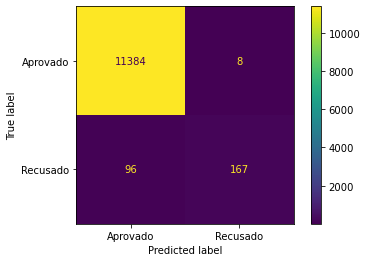

In [71]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_treino,y_treino)

plot_confusion_matrix(clf,x_treino,y_treino,display_labels=["Aprovado","Recusado"]);

In [65]:
# Arvore com todas Variaveis

clf = DecisionTreeClassifier(random_state=100)

clf

DecisionTreeClassifier(random_state=100)

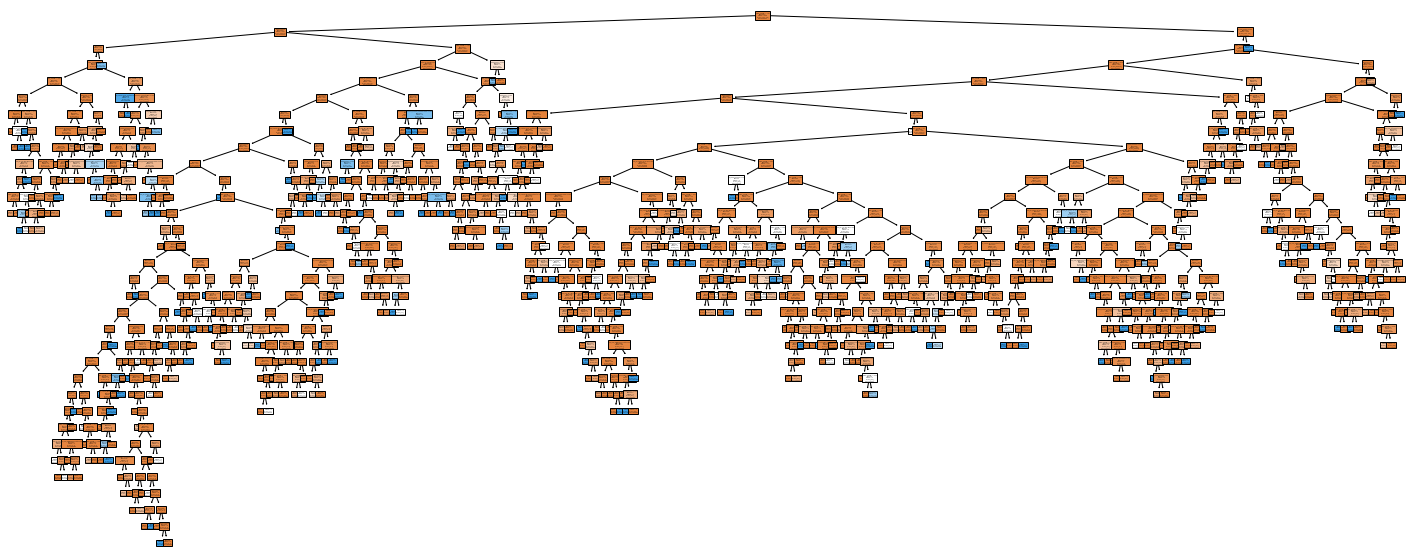

In [66]:
clf = clf.fit(x,y)

plt.figure(figsize=[25,10])
plot_tree(
    clf,
    filled=True,
    class_names=["Aprovado","Recusado"]  ,
    feature_names=x.columns
    
);

In [69]:
predict = clf.predict(x_teste)
round(accuracy_score(y_teste,predict) * 100,2)

98.98

In [70]:
predict = clf.predict(x_treino)
round(accuracy_score(y_treino,predict) * 100,2)

98.94

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


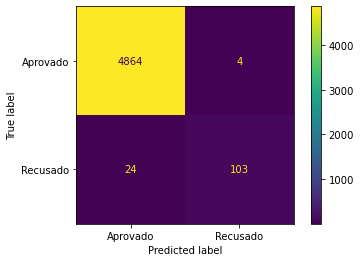

In [73]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_teste,y_teste)

plot_confusion_matrix(clf,x_teste,y_teste,display_labels=["Aprovado","Recusado"]);

In [74]:
predict = clf.predict(x_teste)
round(accuracy_score(y_teste,predict) * 100,2)

99.44

In [75]:
clf = DecisionTreeClassifier(max_depth=2,random_state=100)
clf = clf.fit(x_treino,y_treino)

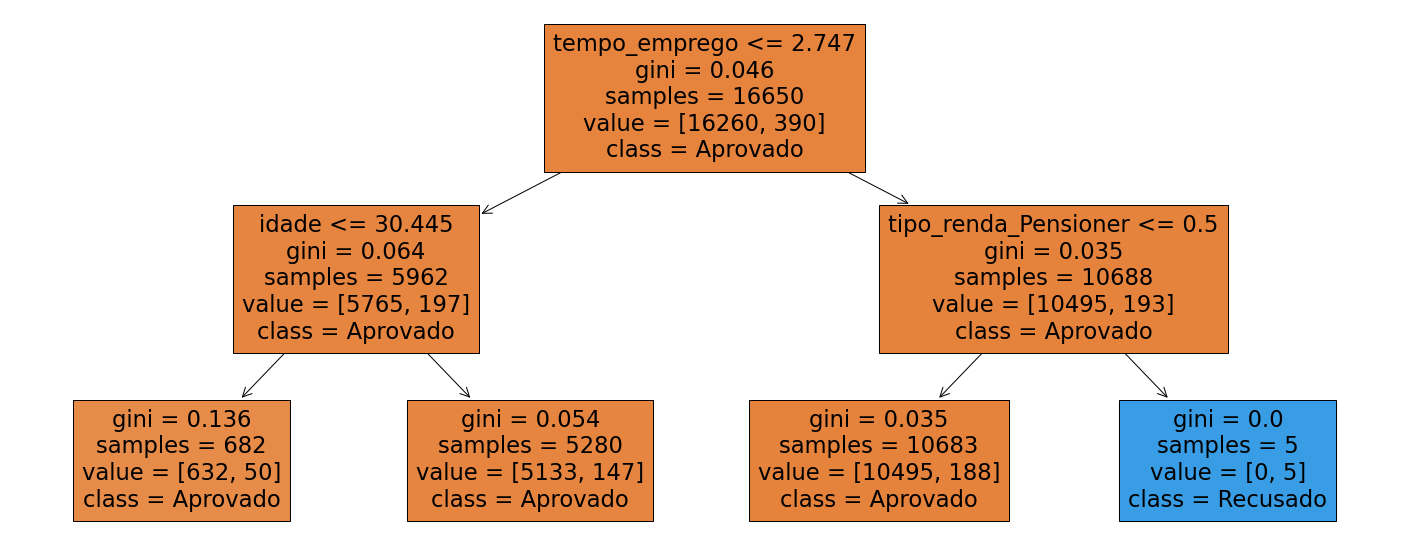

In [76]:
clf = clf.fit(x,y)

plt.figure(figsize=[25,10])
plot_tree(
    clf,
    filled=True,
    class_names=["Aprovado","Recusado"]  ,
    feature_names=x.columns
    
);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


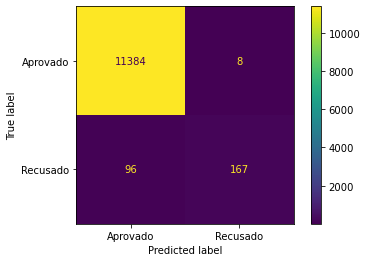

In [78]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_treino,y_treino)

plot_confusion_matrix(clf,x_treino,y_treino,display_labels=["Aprovado","Recusado"]);

In [77]:
predict = clf.predict(x_treino)
round(accuracy_score(y_treino,predict) * 100,2)

97.78